In [1]:
'''
Fluids PS2 Exercise 3
@author: Patrick Horlaville
@collab: Sneha Nair
February 12th, 2022
'''

'\nFluids PS2 Exercise 3\n@author: Patrick Horlaville\n@collab: Sneha Nair\nFebruary 12th, 2022\n'

In [2]:
import numpy as np
import matplotlib.pyplot as mpl
import pandas as pd
import plotly
import plotly.figure_factory as ff
from PIL import Image
import glob
import os
import imageio

In [3]:
dt = 0.2
Nsteps = 100
#adjust if needed

In [4]:
## Setting up initial conditions (vortex centres and circulation)
# Vortex rings
y_v=np.array([11,11,14,14])
x_v=np.array([11,14,11,14])
k_v=np.array([1,1,-1,-1])

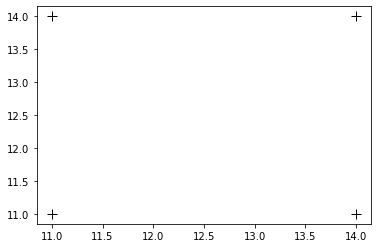

In [5]:
# Setting up the plot
mpl.ion()
fig , ax = mpl.subplots(1,1)
p, = ax.plot(x_v,y_v, 'k+', markersize=10)


# draw the initial velocity streamline
ngrid = 2
Y, X = np.mgrid[9:16:360j, 9:16:360j]

vel_x=np.zeros(np.shape(Y)) #this holds x−velocity
vel_y=np.zeros(np.shape(Y)) #this holds y−velocity

# masking radius for better visualization of the vortex centres
r_mask = 1

## Now we want to compute the velocity field

In [6]:
def velocity_field(xx, yy, x_v, y_v, kk):

    d = np.sqrt((x_v-xx)**2+(y_v-yy)**2)
    
    u_y = (kk/d)*(x_v-xx)/d
    
    u_x = (-kk/d)*(y_v-yy)/d
    
    return (u_x, u_y)

## And loop over each vortex

### (don't forget to account for the mask)

In [7]:
def looping(X_grid, Y_grid, x_v, y_v, k_v, mask):
    
    x_n = np.zeros(np.shape(X)) 
    y_n = np.zeros(np.shape(Y)) 
    
    for i in range(len(x_v)):
        for j in range(len(X_grid)):
            for k in range(len(Y_grid)):
                
                X_newgrid = X_grid[j]
                Y_newgrid = Y_grid[k]
                
                x_vi = x_v[i]
                y_vi = y_v[i]
                
                k_val = k_v[i]
                
                re = velocity_field(X_newgrid, Y_newgrid, x_vi, y_vi, k_val)
                
                d =  np.sqrt((x_v[i]-j)**2+(y_v[i]-k)**2)
                x_n[k][j] += re[0]
                y_n[k][j] += re[1]
                
                if d <= mask:
                    
                    x_n[k] = float('nan')
                    y_n[k] = float('nan')
                    
    return (x_n, y_n)  

## Now we want to account for the motion of the vortices

In [9]:
def vortex_motion(x_def, y_def, k_v):
    
    x_p = [0]*len(x_def) 
    y_p = [0]*len(y_def) 
    
    for i in range(len(x_def)):
        
        v_x = 0
        v_y = 0
        
        for j in range(len(x_def)):
            if j!= i: 
                
                re = velocity_field(x_def[i], y_def[i], x_def[j], y_def[j], k_v[j])
                v_x += re[0]
                v_y += re[1]
                
        x_p[i] = x_def[i] + v_x*dt
        y_p[i] = y_def[i] + v_y*dt
        
    mpl.plot(x_p[0], y_p[0], 'b*', markersize=10)
    mpl.plot(x_p[1], y_p[1], 'k*', markersize=10)
    mpl.plot(x_p[2], y_p[2], 'b*', markersize=10)
    mpl.plot(x_p[3], y_p[3], 'k*', markersize=10)
    
    return (x_p,y_p)

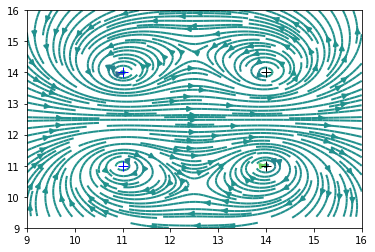

In [10]:
#Looking at the vortex for starting time.
x,y = looping(X[0], Y[:,0], x_v, y_v, k_v, r_mask)

mpl.plot(x_v[0], y_v[0], 'b+', markersize=10)
mpl.plot(x_v[1], y_v[1], 'k+', markersize=10)
mpl.plot(x_v[2], y_v[2], 'b+', markersize=10)
mpl.plot(x_v[3], y_v[3], 'k+', markersize=10)

mpl.streamplot(X, Y, x, y, density=[2,2], color=y, linewidth=2) 

## We now want to produce a mini-movie out of a repeated amount of time steps

## First, generate each frame

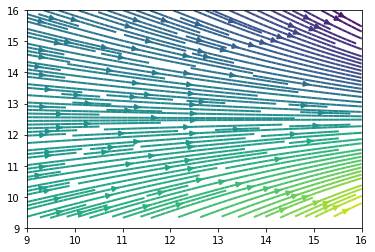

In [11]:
count = 0 
intial_x = x_v
intial_y = y_v

while count < Nsteps:
    
    mpl.clf()
    x_new, y_new = vortex_motion(intial_x, intial_y, k_v)
    intial_x = x_new
    intial_y = y_new
    
    x,y = looping(X[0], Y[:,0], x_new, y_new, k_v, r_mask)
    
    mpl.plot(intial_x[0], intial_y[0], 'b*', markersize=10)
    mpl.plot(intial_x[1], intial_y[1], 'k*', markersize=10)
    mpl.plot(intial_x[2], intial_y[2], 'b*', markersize=10)
    mpl.plot(intial_x[3], intial_y[3], 'k*', markersize=10)
    
    mpl.xlim([9,16])
    mpl.ylim([9,16])
    
    mpl.streamplot(X, Y, x, y, density=[2,2], color=y, linewidth=2) #cmap='cool'
    mpl.savefig('photo'+ str(count+1) +'.png')
    count += 1

### (takes about 20 minutes for a hundred frames)

## Then, combine the frames in a single .gif

In [15]:
frames = []
images = glob.glob("photo*.png")
list.sort(images, key=lambda x: int(x.split('photo')[1].split('.png')[0]))


with open('image_list.txt', 'w') as file:
    for item in images:
        file.write("%s\n" % item)


inorder = open("image_list.txt").readlines()

for i in images:
    frame = Image.open(i)
    frames.append(frame)

frames[0].save('vortices_action.gif', save_all=True, append_images=frames[1:], duration=100, loop=0)


os.system('convert @image_list.txt {}.gif'.format('thing'))


32512

## On my first try (dt =1),  the vortices' interactions happened quickly and they disappeared soon enough. I reduced the timestep to .2 so I hope it looks better when re-ran (I didn't have the time to launch another run)